In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score

In [13]:
#read unstructured csv to appropriate dataframe representation
diabetes_df = pd.read_csv('diabetes_data.csv')
columns = ['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weightloss', 'weakness', 'polyphagia',
          'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis',
          'muscle_stiffness', 'alopecia', 'obesity', 'class']
diabetes_df = diabetes_df.iloc[:,0].str.split(';', expand=True)
diabetes_df.columns = columns
diabetes_df.head()

,age,gender,polyuria,polydipsia,sudden_weightloss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [14]:
#drop column unrelated to diagnose result
diabetes_pre = diabetes_df.drop('gender', axis = 1)
#setting column data types to correct one
diabetes_pre = diabetes_pre.astype(int)
diabetes_pre.drop_duplicates()
diabetes_pre.info()
#dataset free from null values, no need for imputation
#all column can be considered as numerical (binary categorical)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                520 non-null    int32
 1   polyuria           520 non-null    int32
 2   polydipsia         520 non-null    int32
 3   sudden_weightloss  520 non-null    int32
 4   weakness           520 non-null    int32
 5   polyphagia         520 non-null    int32
 6   genital_thrush     520 non-null    int32
 7   visual_blurring    520 non-null    int32
 8   itching            520 non-null    int32
 9   irritability       520 non-null    int32
 10  delayed_healing    520 non-null    int32
 11  partial_paresis    520 non-null    int32
 12  muscle_stiffness   520 non-null    int32
 13  alopecia           520 non-null    int32
 14  obesity            520 non-null    int32
 15  class              520 non-null    int32
dtypes: int32(16)
memory usage: 32.6 KB


<function matplotlib.pyplot.show(close=None, block=None)>

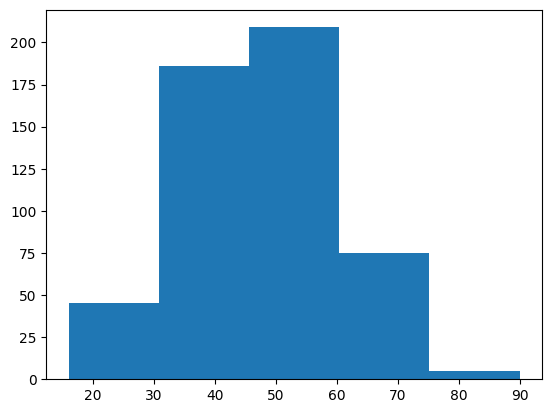

In [15]:
plt.hist(diabetes_pre['age'], bins = 5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

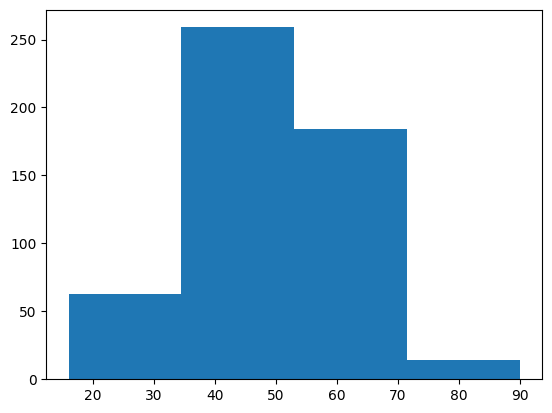

In [16]:
plt.hist(diabetes_pre['age'], bins = 4)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

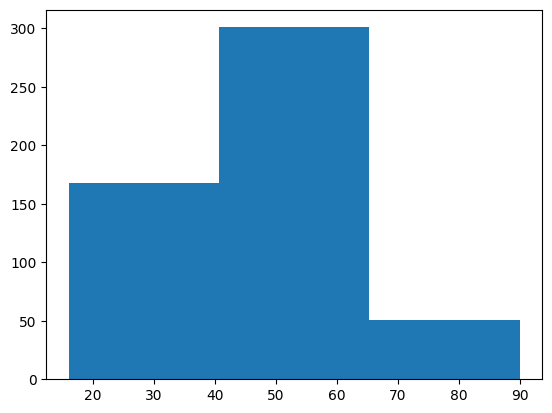

In [17]:
plt.hist(diabetes_pre['age'], bins = 3)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

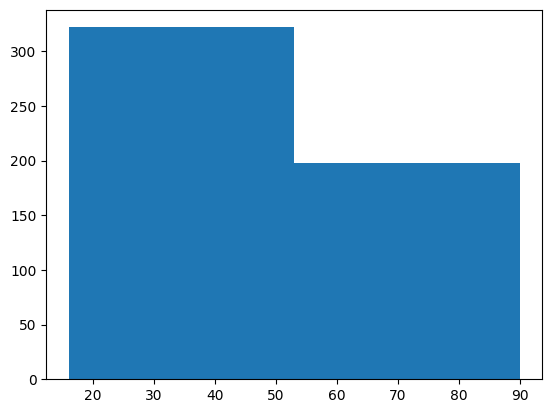

In [18]:
plt.hist(diabetes_pre['age'], bins = 2)
plt.show
#2 bins is most suitable to categorize data since the amount of data each bins do not differ largely

Bin Edges :  [16. 53. 90.]


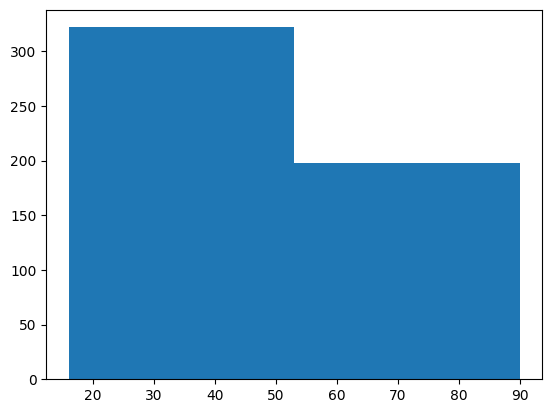

In [19]:
hist_values, bin_edges, _ = plt.hist(diabetes_pre['age'], bins=2)
print('Bin Edges : ', bin_edges)

In [20]:
#Splitting target and predictor variable
y = diabetes_pre['class']
X = diabetes_pre.drop('class', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state=123)
X_train, y_train

(     age  polyuria  polydipsia  sudden_weightloss  weakness  polyphagia  \
 252   39         1           1                  1         1           1   
 513   62         1           1                  1         1           0   
 401   36         0           0                  0         0           0   
 276   30         0           0                  0         0           0   
 73    38         1           1                  1         1           1   
 ..   ...       ...         ...                ...       ...         ...   
 69    50         1           1                  1         1           1   
 299   43         1           1                  1         1           1   
 333   30         0           0                  0         0           0   
 246   46         0           0                  0         1           0   
 62    55         1           1                  0         1           1   
 
      genital_thrush  visual_blurring  itching  irritability  delayed_healing  \
 252 

In [21]:
#reclassify age by age groups 
X_dt_train = X_train
# decision tree are not sensitive to feature scaling, normalization and standardization is not needed
# age is grouped to 2 category across 0 to 100, transforming continuous variable to categorical is beneficial to dt algorithm
# 2 category is selected to minimize sample data size discrepancies between each bin
X_dt_train['age_class'] = X_dt_train['age'].apply(lambda x : 1 if (x < 53)                                                 
                                                 else 0)

X_dt_train['age_class'].value_counts(normalize=True)


age_class
1    0.615385
0    0.384615
Name: proportion, dtype: float64

In [11]:
#X_dt_train['age_class'] = X_dt_train['age'].apply(lambda x : 1 if (x < X_dt_train['age'].mean())                                                 
#                                                 else 0)
#
#X_dt_train['age_class'].value_counts(normalize=True)

age_class
1    0.538462
0    0.461538
Name: proportion, dtype: float64

In [22]:
X_dt_train.drop('age', axis = 1, inplace=True)

In [23]:
for column in X_dt_train.columns :
    print(X_dt_train[column].value_counts(normalize = True))
#genital thrush, irritability, alopecia, obesity has imbalance class size

polyuria
1    0.513736
0    0.486264
Name: proportion, dtype: float64
polydipsia
0    0.535714
1    0.464286
Name: proportion, dtype: float64
sudden_weightloss
0    0.57967
1    0.42033
Name: proportion, dtype: float64
weakness
1    0.596154
0    0.403846
Name: proportion, dtype: float64
polyphagia
0    0.535714
1    0.464286
Name: proportion, dtype: float64
genital_thrush
0    0.777473
1    0.222527
Name: proportion, dtype: float64
visual_blurring
0    0.543956
1    0.456044
Name: proportion, dtype: float64
itching
0    0.527473
1    0.472527
Name: proportion, dtype: float64
irritability
0    0.766484
1    0.233516
Name: proportion, dtype: float64
delayed_healing
0    0.543956
1    0.456044
Name: proportion, dtype: float64
partial_paresis
0    0.552198
1    0.447802
Name: proportion, dtype: float64
muscle_stiffness
0    0.60989
1    0.39011
Name: proportion, dtype: float64
alopecia
0    0.68956
1    0.31044
Name: proportion, dtype: float64
obesity
0    0.821429
1    0.178571
Name: pro

In [24]:
#setting class weight as balanced to deal imbalance class size
dt = DecisionTreeClassifier(class_weight = 'balanced')
dt.fit(X_dt_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

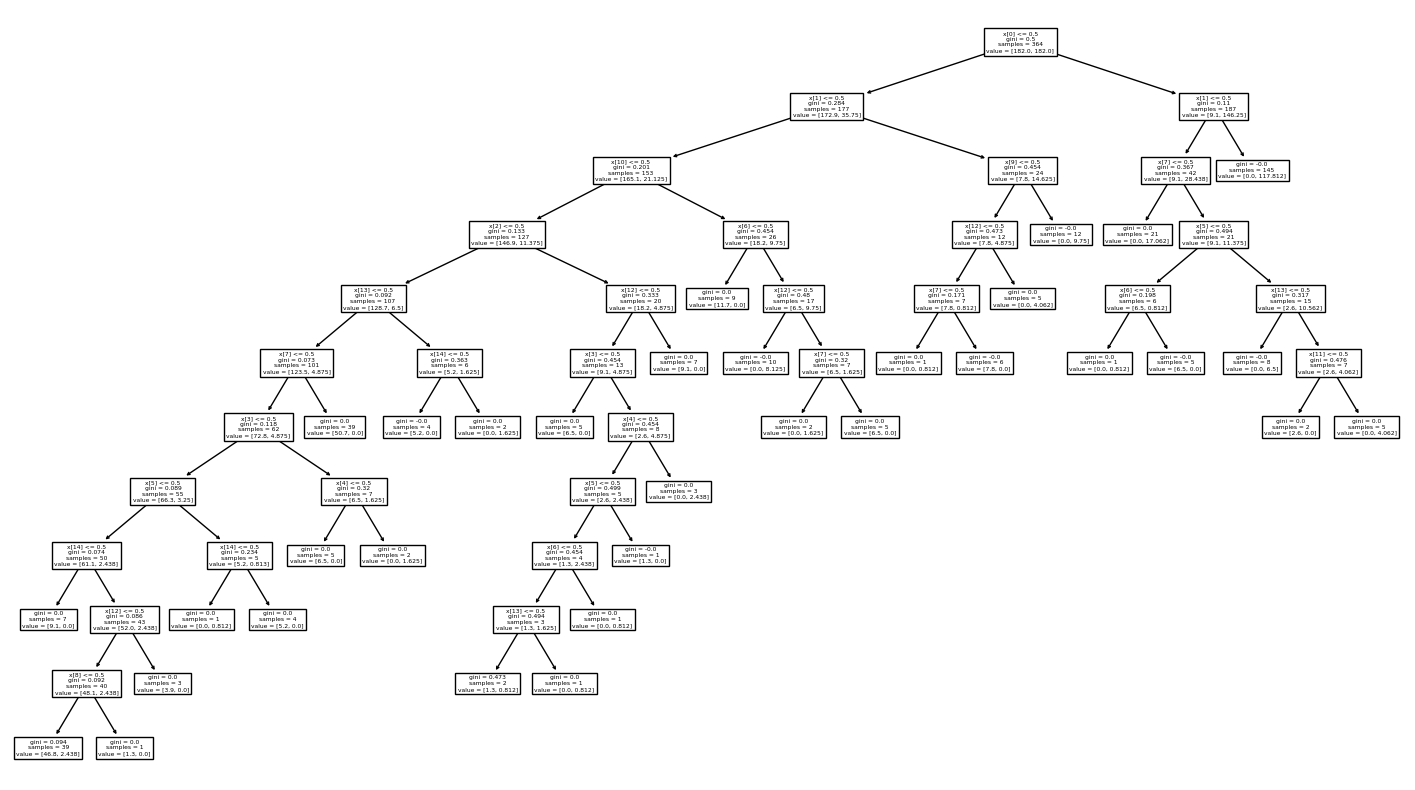

In [25]:
#plot the tree
_, ax = plt.subplots(figsize=(18, 10))
_ = plot_tree(dt, ax=ax)

In [26]:
y_dt_predict = pd.DataFrame(dt.predict(X_dt_train))

In [27]:
dt_accuracy = accuracy_score(y_train, y_dt_predict)
dt_cm = confusion_matrix(y_train, y_dt_predict)
dt_cm_df = pd.DataFrame(dt_cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
dt_cm_df

,Predicted Negative,Predicted Positive
Actual Negative,140,0
Actual Positive,4,220


In [28]:
print(f'decision tree accuracy : {dt_accuracy :.2f}')
#with such accuracy, its actually a symptom of an overfit
#let's try to prune the tree up to 6th level to introduce bias and reduce overfit

decision tree accuracy : 0.99


In [29]:
X_test.head()
#X test need feature engineering on age column
X_dt_test = X_test
X_dt_test['age_class'] = X_dt_test['age'].apply(lambda x : 1 if (x < 53)                                                 
                                                 else 0)
X_dt_test.drop('age', axis=1, inplace=True)
X_dt_test.head()

,polyuria,polydipsia,sudden_weightloss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,age_class
232,0,1,0,1,1,0,1,1,0,1,0,1,1,0,0
381,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0
332,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1
44,1,1,1,1,0,0,1,1,0,0,1,1,0,0,1
396,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
#predict y
y_dt_test_predict = pd.DataFrame(dt.predict(X_test))

#display metric
dt_accuracy = accuracy_score(y_test, y_dt_test_predict)
dt_cm = confusion_matrix(y_test, y_dt_test_predict)
dt_cm_df = pd.DataFrame(dt_cm, index = ['Actual Negative', 'Actual Positive'], columns = ['Predicted Negative','Predicted Positive'])
dt_cm_df

,Predicted Negative,Predicted Positive
Actual Negative,59,1
Actual Positive,9,87


In [31]:
print(f'decision tree on test data accuracy : {dt_accuracy :.2f}')

decision tree on test data accuracy : 0.94


In [32]:
#Evaluating hyperparameter tuning during cross validation
param_grid = {'criterion' : ['gini', 'entropy', 'log_loss'],
             'max_depth' : [7,6,5,4],
             'min_samples_leaf' : [1,2,3]}
grid_search = GridSearchCV(dt, param_grid, cv=10, scoring ='accuracy')
grid_search.fit(X_dt_train, y_train)
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
#Cross Validation seem stable on every partition on every param grid combination

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008996,0.003985,0.003640,0.003871,gini,7,1,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.972973,0.972973,...,0.945946,0.944444,0.861111,0.861111,0.944444,0.888889,0.972222,0.931006,0.041920,15
1,0.007259,0.002645,0.004073,0.004126,gini,7,2,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.945946,0.945946,...,0.918919,0.916667,0.861111,0.888889,0.944444,0.888889,0.944444,0.920120,0.029378,27
2,0.005900,0.002818,0.003751,0.003665,gini,7,3,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.972973,0.972973,...,0.972973,0.944444,0.861111,0.861111,0.944444,0.916667,0.972222,0.936486,0.041524,5
3,0.008338,0.003421,0.003684,0.003515,gini,6,1,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.945946,0.972973,...,0.945946,0.972222,0.861111,0.833333,0.944444,0.916667,0.972222,0.931081,0.045431,13
4,0.005736,0.003446,0.003460,0.003832,gini,6,2,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.945946,0.945946,...,0.891892,0.916667,0.861111,0.888889,0.944444,0.916667,0.972222,0.922973,0.032410,25
5,0.006436,0.003484,0.003656,0.003690,gini,6,3,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",1.000000,0.972973,...,0.945946,0.916667,0.861111,0.861111,0.916667,0.916667,0.972222,0.928228,0.043474,21
6,0.006942,0.002745,0.004692,0.002925,gini,5,1,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",1.000000,0.972973,...,0.945946,0.972222,0.861111,0.888889,0.916667,0.916667,0.972222,0.936562,0.041292,4
7,0.006704,0.002951,0.003380,0.004149,gini,5,2,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",1.000000,0.945946,...,0.972973,0.972222,0.861111,0.888889,0.944444,0.916667,0.972222,0.939339,0.040791,2
8,0.009124,0.002142,0.003157,0.003429,gini,5,3,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",1.000000,0.972973,...,0.972973,0.944444,0.861111,0.861111,0.916667,0.916667,0.972222,0.933709,0.045185,7
9,0.005915,0.003314,0.006276,0.003243,gini,4,1,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.945946,0.972973,...,0.918919,1.000000,0.861111,0.805556,0.944444,0.916667,0.972222,0.928378,0.054546,16


In [33]:
results = []

for criterion in param_grid['criterion']:
    for max_depth in param_grid['max_depth']:
        for min_samples_leaf in param_grid['min_samples_leaf']:
            dt = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_leaf=min_samples_leaf, class_weight='balanced')
            dt.fit(X_dt_train, y_train)
            train_accuracy = dt.score(X_dt_train, y_train)
            test_accuracy = dt.score(X_dt_test, y_test)
            results.append({
                'criterion': criterion,
                'max_depth': max_depth,
                'min_samples_leaf': min_samples_leaf,
                'train_accuracy': train_accuracy,
                'test_accuracy': test_accuracy
            })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='test_accuracy', ascending=False))
#it is found that using gini criterion, 6 max depth, and 1 min_samples_leaf will give optimum test accuracy and simpler computation
#hyperparameter chosen has 97,80% and 92,94% accuracy on train data and test data respectively

   criterion  max_depth  min_samples_leaf  train_accuracy  test_accuracy
0       gini          7                 1        0.975275       0.929487
15   entropy          6                 1        0.978022       0.929487
27  log_loss          6                 1        0.978022       0.929487
3       gini          6                 1        0.978022       0.929487
12   entropy          7                 1        0.975275       0.923077
24  log_loss          7                 1        0.975275       0.923077
25  log_loss          7                 2        0.969780       0.916667
1       gini          7                 2        0.969780       0.916667
13   entropy          7                 2        0.969780       0.916667
4       gini          6                 2        0.972527       0.916667
16   entropy          6                 2        0.967033       0.910256
28  log_loss          6                 2        0.967033       0.910256
29  log_loss          6                 3        0.